## Foi utilizado o capítudo 10.2 da AP42, por se tratar de um emprendimento de embalagens de papel 

In [34]:

# Utilizando Pandas para abrir a planilha
import pandas as pd
import os

# Coletando o caminho da pasta que estou, diretório de trabalho atual,
# o qual o script Python está sendo executado
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

# Indicando nome do arquivo da tabela 
chapterNumer = 10
subChapter = 2
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file)

print(fe)

C:\Users\Carlos Suganuma - VB\Documents\GitHub\ENS5173_202401\tabelas\FE
chp_10_2.csv
                 Source     MP   SO2    CO
0                  DRBT    0.0  0.00  0.00
1                   BSW    0.0  0.00  0.00
2                   MEE    0.0  0.00  0.00
3       Recovery boiler  115.0  0.00  5.50
4                   SDT    3.5  0.10   NaN
5             Lime kiln   28.0  0.15  0.05
6  Turpentine condenser    0.0  0.00  0.00


Source    DRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDR...
MP                                                 296662.5
SO2                                                  506.25
CO                                                 11238.75
dtype: object
1
2
3


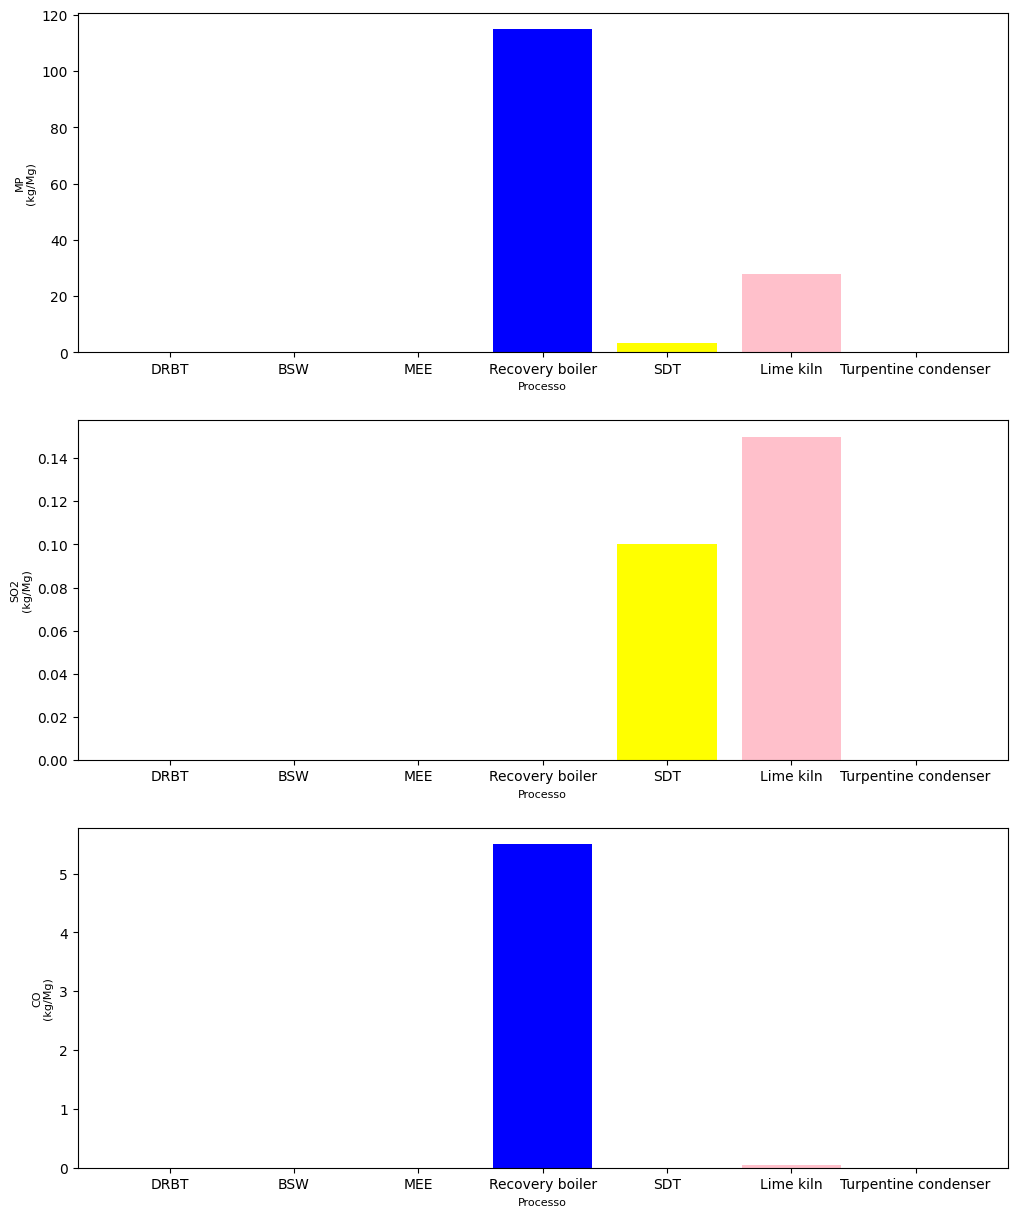

In [35]:
# Plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = 2025 # Considerando uma taxa de atividade 
emis = fe*atv

#somando dataframe
print(emis.sum())

#Criando a figura com matplotlib, gráficos
#subplots com número de linas igual ao número de poluentes 

#sharex significa compartilhar o eixo x 
fig,ax = plt.subplots(len(fe.columns)-1,1, figsize=(12,15))

#loop para preencher o suplot com os gráficos de barra 
for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Source'], fe.iloc[:,ii],color = ['blue','yellow','pink'])
    ax[ii-1].set_xlabel('Processo',fontsize=8)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/Mg)', fontsize=8) #invente a umidade 
    
#salvar a figura do gráfico na pasta figures 
#fig.savefig(cwd+'\\figures\\barplot_fator')  

#fig,ax = plt.subplots()
#emis.plot.bar(ax=ax,x='Source')

## Criando taxa de atividade aleatória com sazonalidade 
Nesta sessão nós criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatória. 


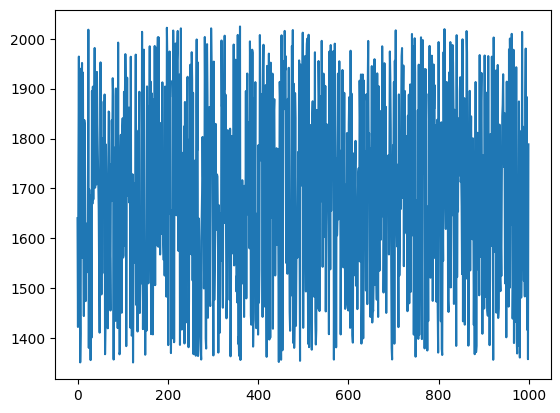

In [36]:
# Criando vetor de valores aleatórios
import numpy as np
atvMax = 2025
atvMin = 1350
n = 1000
atv = (atvMax-atvMin)*np.random.rand(n) + atvMin
#print(atv)

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(atv)

In [8]:
# pegar a proxima parte no github do prof 

In [37]:
# ajustar meus números aleatórios com base no comprimento do valor de datas
# extraindo o número de linhas/ número de datas 
#ceiando vetor de datas 
import pandas as pd 
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

#criando DataFrame com as datas 
df = pd.DataFrame({'Data': datas})

# Extrair o dia do ano das datas e adicioná-lo como uma nova coluna no DataFrame
#considerando o dia um ordinal do ano 'dayofyear'
df['Dia_do_Ano'] = df['Data'].dt.dayofyear 

# Copiando os resultados para a área de transferência
df.to_clipboard(index=False, header=True)

# Mostrar o DataFrame resultante
print(df)

# Salvar o DataFrame em um arquivo CSV
df.to_csv(r'C:\Users\Carlos Suganuma - VB\Documents\GitHub\ENS5173_202401\tabelas\FE\atv.csv')

          Data  Dia_do_Ano
0   2024-01-01           1
1   2024-01-02           2
2   2024-01-03           3
3   2024-01-04           4
4   2024-01-05           5
..         ...         ...
361 2024-12-27         362
362 2024-12-28         363
363 2024-12-29         364
364 2024-12-30         365
365 2024-12-31         366

[366 rows x 2 columns]


In [38]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
#print(atv)
print(df)

# Salvar o DataFrame em um arquivo CSV
df.to_csv(r'C:\Users\Carlos Suganuma - VB\Documents\GitHub\ENS5173_202401\tabelas\FE\atv.csv')



          Data  Dia_do_Ano    atividade
0   2024-01-01           1  1576.586511
1   2024-01-02           2  1450.499475
2   2024-01-03           3  1421.718064
3   2024-01-04           4  1912.548777
4   2024-01-05           5  1892.900652
..         ...         ...          ...
361 2024-12-27         362  1621.933315
362 2024-12-28         363  1835.121687
363 2024-12-29         364  1452.332006
364 2024-12-30         365  1520.766915
365 2024-12-31         366  1368.085739

[366 rows x 3 columns]


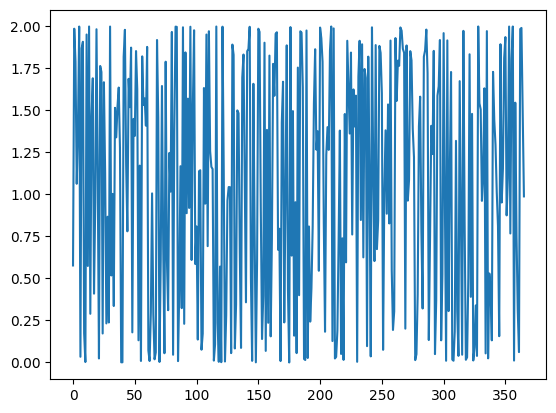

In [55]:
# Criando componente sazonal
# transformando o vetor data em um angulo 
sazonalidade = np.cos((2*np.pi)*df['atividade']/365)+ 1
plt.plot(sazonalidade)
#adicionando 1 para a função ficar acima do eixo x, positiva 
#df['sazonalidade'] = sazonalidade + 1
df.to_csv(r'C:\Users\Carlos Suganuma - VB\Documents\GitHub\ENS5173_202401\tabelas\FE\atv.csv')


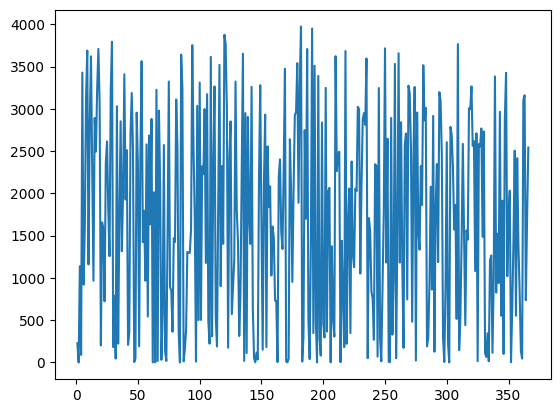

In [56]:
#Valores aleatórios com sazonalidade

df['aleatorioSazonal'] = df['atividade'] * df['sazonalidade'] 

plt.plot(df['Dia_do_Ano'], df['aleatorioSazonal'])
